# <center>Linear, Polynomial, and Decision Tree Regression</center>
<center>Shan-Hung Wu & DataLab<br/>Fall 2016</center>

In [2]:
from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline

In this lab, we will guide you through the linear and polynomial regression using the [Housing](https://archive.ics.uci.edu/ml/datasets/Housing) dataset. We will also extend the decision tree model we have learned for the regression problem. 

## Linear Regression

Regression models are used to predict target variables ($y$'s) in a continuous scale, which makes them attractive for

- Understanding relationships between variables
- Evaluating trends
- Making forecasts

Consider the 1-D points ($x$'s) consisting of a single explanatory variable, the linear model is defined as:

$$ \hat{y} = w_0 + w_1x$$

Minimizing the sum of squared errors (SSE) can be understood as finding the best-fitting straight line through the example points. The best-fitting line is called the regression line (or hyperplane when $x \in \mathbb{R}^{D}$, $D > 1$), and the vertical offsets from the regression line to the data points are called the **residuals** (i.e., the errors of our prediction), as shown in the following:

![alt text](fig-linear-regression.png)

Note that the $w_0$ and $w_1$ control the intercept/bias and slope of the regression line respectively.

## The Housing dataset

The [Housing](https://archive.ics.uci.edu/ml/datasets/Housing) dataset from UCI repository collects information about houses in the suburbs of Boston. Following are the attributes:

<pre>
1.  CRIM      Per capita crime rate by town
2.  ZN        Proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3.  INDUS     Proportion of non-retail business acres per town
4.  CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5.  NOX       Nitric oxides concentration (parts per 10 million)
6.  RM        Average number of rooms per dwelling
7.  AGE       Proportion of owner-occupied units built prior to 1940
8.  DIS       Weighted distances to five Boston employment centres
9.  RAD       Index of accessibility to radial highways
10. TAX       Full-value property-tax rate per $10,000
11. PTRATIO   Pupil-teacher ratio by town
12. B         1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT     % lower status of the population
14. MEDV      Median value of owner-occupied homes in $1000's
</pre>

Let's load the data first.

In [3]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'housing/housing.data',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Our goal is to predict the house prices ('MEDV'), which is in a continuous scale, using the values of some other variable. To select proper explanatory variables, we plot the pairwise join distributions:

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', context='notebook')
# for readability, we only plot five attributes
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.savefig('./output/fig-housing-pairwise-dist.png', dpi=300)
plt.show()
sns.reset_orig()

ImportError: No module named 'seaborn'

Using this scatter-plot matrix, we can now quickly eyeball how the data is distributed and whether it contains outliers. For example, we can see that there is a linear relationship between `RM` and the house prices `MEDV`. Furthermore, we can see in the histogram that both `RM` and `MEDV` variable seems to be normally distributed but `MEDV` contains several **outliers**, i.e., values that deviate from the majority values a lot. Let's use `RM` as the explanatory variable for our first linear regression task:

In [48]:
import numpy as np

X_rm = df['RM'].values[:, np.newaxis]
y = df['MEDV'].values

## Fitting a Linear Regression Model via Scikit-learn

Scikit-learn has already implemented an `LinearRegression` class that we can make use of:

In [4]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_rm, y)

y_pred = slr.predict(X_rm)

print('Slope (w_1): %.2f' % slr.coef_[0])
print('Intercept/bias (w_0): %.2f' % slr.intercept_)

NameError: name 'X_rm' is not defined

We may interpret the slope 9.10 as the average increase in 'MEDV' due to 'RM'. And the intercept sometimes also has physical meaning, but not in this case. Since that there is no negative value of a house.

Next, let's visualize how well the linear regression line fits the training data:

In [5]:
# To simplify our codes, predefine a function to visualize to regression line and data scatter plot.
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return 

lin_regplot(X_rm, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
plt.savefig('./output/fig-linreg-scikit-rm.png', dpi=300)
plt.show()

NameError: name 'X_rm' is not defined

As we can see, the linear regression line reflects the general trend that house prices tend to increase with the number of rooms. Interestingly, we also observe a curious line at $y = 50$, which suggests that the
prices may have been clipped.

## Multivariate Cases & Performance Evaluation

If we have multiple explanatory variables, we can't visualize the linear regression hyperplane in a two-dimensional plot. In this case, we need some other ways to evaluate the trained model. Let's proceed with the multivariate linear regression and evaluate the results using the mean squared error (MSE) and coefficient of determination ($R^{2}$):

In [51]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X = df.iloc[:, :-1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])

# Standardization

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Training

slr = LinearRegression()
slr.fit(X_train_std, y_train)

# Testing

y_train_pred = slr.predict(X_train_std)
y_test_pred = slr.predict(X_test_std)

print('MSE train: %.2f, test: %.2f' % (
                mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (
                r2_score(y_train, y_train_pred),
                r2_score(y_test, y_test_pred)))

#Training data points: 354
#Testing data points: 152
MSE train: 19.96, test: 27.20
R^2 train: 0.76, test: 0.67


$R^2$ is a value between 0 and 1 (you can prove that $SST \geq SSE$). The higher $R^2$ the better. And we often consider $R^2 > 0.8$ as good.

NOTE: it is important to standardize the explanatory variables in multivariate regression in order to improve the conditioning of the cost function and to prevent attributes with large values from dominating.

#### Residual Plot

In addition, the **residual plot** is a commonly used graphical analysis for a regression model to detect nonlinearity and outliers. In the case of a perfect prediction, the residuals would be exactly zero, which we will probably never encounter in realistic and practical applications. However, for a good regression model, we would expect that the errors are randomly distributed and the residuals should be **randomly scattered around the centerline**. If we see patterns in a residual plot, it means that our model is unable to capture some explanatory information, which is leaked into the residuals (as we can slightly see in the below). Furthermore, we can also use residual plots to detect outliers, which are represented by the points with a large deviation from the centerline.

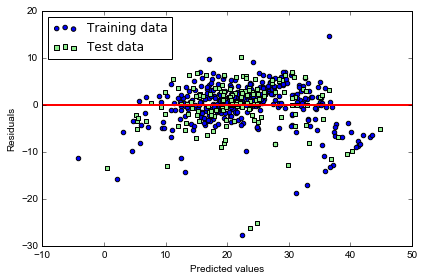

In [52]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.savefig('./output/fig-linreg-scikit-residuals.png', dpi=300)
plt.show()

## Implementing the Linear Regression

Now, let's implement our own linear regression model. It is almost the same as the Adaline classifier we have implemented:

In [53]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

It is always a good practice to plot the cost as a function of the number of epochs (passes over the training dataset) when we are using optimization algorithms, such as gradient descent, to check for the convergence:

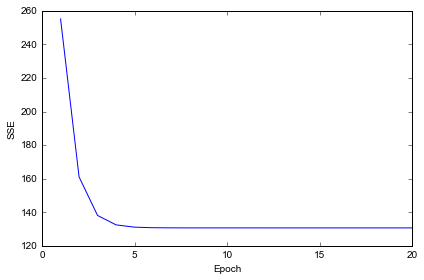

In [54]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_rm_std = sc_x.fit_transform(X_rm)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(X_rm_std, y_std)

plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.savefig('./output/fig-linreg-gd-cost.png', dpi=300)
plt.show()

Next, let's visualize how well the linear regression line fits the training data:

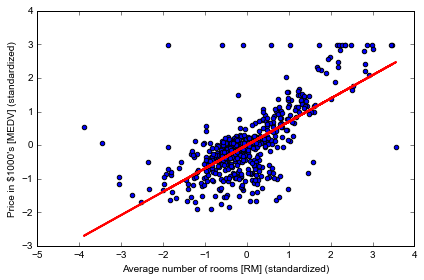

In [55]:
lin_regplot(X_rm_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.tight_layout()
plt.savefig('./output/fig-linreg-gd-rm.png', dpi=300)
plt.show()

We can see that the overall result looks almost identical to the Scikit-learn implementation. Note, however, that the implementation in Scikit-learn makes use of the [LIBLINEAR](http://www.csie.ntu.edu.tw/~cjlin/liblinear/) library and advanced optimization algorithms that work better with unstandardized variables.

## Polynomial Regression

Linear regression assumes a linear relationship between explanatory and response variables, which may **not** hold in the real world. For example, by seeing the pairwise distribution plot again, we find that the `LSTAT` (% lower status of the population) attribute is clearly not linearly correlated with our target variable `MEDV`. Next, let's construct polynomial features and turn our linear regression models into the polynomial ones.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

X_lin = df['LSTAT'].values[:, np.newaxis]

regr = LinearRegression()

# Create quadratic features

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X_lin)
X_cubic = cubic.fit_transform(X_lin)

# fit features
X_fit = np.arange(X_lin.min(), X_lin.max(), 1)[:, np.newaxis]

regr = regr.fit(X_lin, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X_lin))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X_lin, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('./output/fig-polyreg-degree.png', dpi=300)
plt.show()

NameError: name 'np' is not defined

In the resulting plot, we can see that the polynomial fit captures the relationship between the response and explanatory variable much better than the linear fit.

## Decision Tree Regression

Polynomial regression is not the only way to capture the nonlinear relationship between the explanatory and target variables. For example, we can modify the Decision Tree model for non-linear regression by simply replacing the entropy as the impurity measure of a node by the MSE. Let's see how it works in our task:

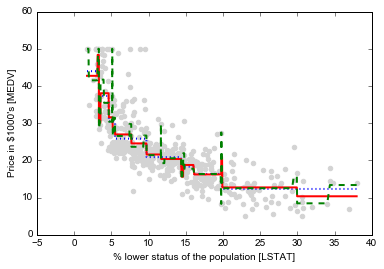

In [57]:
from sklearn.tree import DecisionTreeRegressor

tree_3 = DecisionTreeRegressor(max_depth=3)
tree_3.fit(X_lin, y)
tree_4 = DecisionTreeRegressor(max_depth=4)
tree_4.fit(X_lin, y)
tree_5 = DecisionTreeRegressor(max_depth=5)
tree_5.fit(X_lin, y)

sort_idx = X_lin.flatten().argsort()

plt.scatter(X_lin, y, color='lightgray')

plt.plot(X_lin[sort_idx], tree_3.predict(X_lin)[sort_idx],         
         color='blue', 
         lw=2, 
         linestyle=':')
plt.plot(X_lin[sort_idx], tree_4.predict(X_lin)[sort_idx], 
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_lin[sort_idx], tree_5.predict(X_lin)[sort_idx], 
         color='green', 
         lw=2, 
         linestyle='--')


plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.savefig('./output/fig-treereg-depth.png', dpi=300)
plt.show()

As we can see from the resulting plot, the decision tree captures the general trend in the data. However, a limitation of this model is that it does not capture the continuity and differentiability of the desired prediction. 

We can also modify the Random Forest model for regression to take advantages of an ensemble technique and get a better generalization performance. The basic random forests algorithm for regression is almost identical to the random forest algorithm for classification. The only difference is that we use the MSE criterion to grow individual decision
trees, and the predicted target variable is calculated as the average prediction over all decision trees.

## Remarks

1. Regression models are basically interpolation equations over the range of the explanatory variables. So they may give bad predictions if we extrapolate outside this range.
2. Be careful about the outliers, which may change your regression hyperplane undesirably.